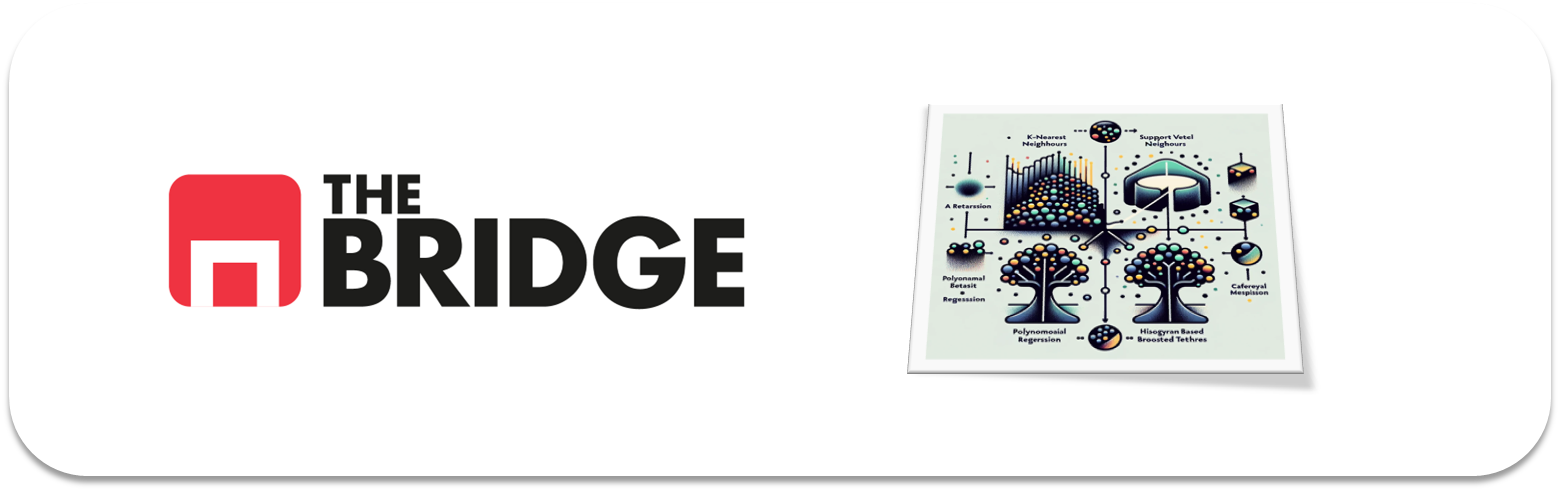

## PRÁCTICA OBLIGATORIA: **Otros Modelos Supervisados**

* La práctica obligatoria de esta unidad consiste en resolver un modelado de clasificación, incluyendo KNN entre los posibles modelos, y aplicando balanceado. Para ello utilizaremos un dataset que ya hemos empleado en los workout. Descarga este notebook en tu ordenador y trabaja en local. Ten en cuenta que tendrás que descar los directorios de imágenes y datos adicionales, si los hubiera.
* Recuerda que debes subirla a tu repositorio personal antes de la sesión en vivo para que puntúe adecuadamente.  
* Recuerda también que no es necesario que esté perfecta, sólo es necesario que se vea el esfuerzo. 
* Esta práctica se resolverá en la sesión en vivo correspondiente y la solución se publicará en el repo del curso. 

### Ejercicio 0

Importa los paquetes y módulos que necesites a lo largo del notebook.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from imblearn.over_sampling import SMOTE
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler

# Modelos
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier


import toolbox_ML_extra as tb
import viz_tools as vt

### #1. El problema y los datos

Vamos a volver al dataset con el que vimos la clasificación binaria con regresión logística, "Give me some credit", y nuestro objetivo es crear un modelo que nos permita predicir si una persona va a encontrarse en dificultades financieras en los dos próximos años. El dataset de partida lo puedes en contrar en el directorio data que acompaña al ejercicio. 

### #1.1
Cárgalo y, apoyándote en las herramientas y fuentes que consideres necesarias, haz una descripción textual de sus variables. Luego con ayuda de los datos, haz una clasificación inicial de sus variables en categóricas y numéricas.

In [2]:
df = pd.read_csv('./data/credit_npo.csv')
df.head(10)

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,0,0.081892,37,0,0.070709,5656.0,12,1,0,0,0.0
1,0,0.023413,74,0,0.209197,4870.0,9,0,1,0,0.0
2,0,0.000000,43,0,0.080784,5000.0,2,0,0,0,2.0
3,0,0.492754,44,0,0.412735,7333.0,4,0,2,0,3.0
4,0,1.000000,63,0,0.000000,8333.0,3,0,0,0,1.0
5,0,0.101002,61,0,0.217115,15880.0,5,0,1,0,0.0
6,0,0.222830,60,0,0.907083,1312.0,5,0,0,0,0.0
7,0,0.353443,39,0,0.764309,4000.0,11,0,1,0,2.0
8,0,0.772455,45,0,0.387179,5100.0,5,0,1,0,3.0
9,0,0.116165,44,0,0.160236,10833.0,8,0,1,0,0.0


| Variable                             | Descripción                                                                                                                                                            |
| ------------------------------------ | ---------------------------------------------------------------------------------------------------------------------------------------------------------------------- |
| SeriousDlqin2yrs                     | Persona con 90 o más días de morosidad en los últimos dos años (binaria, sí o no)                                                                                      |
| RevolvingUtilizationOfUnsecuredLines | Saldo total de tarjetas de crédito y líneas de crédito personales (salvo las inmobiliarias y las que no son a plazos), dividido por la suma de los límites de crédito. |
| age                                  | Edad de la persona que solicita el crédito (prestatario) en años                                                                                                       |
| NumberOfTime30-59DaysPastDueNotWorse | Nº de veces que el prestatario se ha retrasado en el pago entre 30 y 59 días como máximo en los últimos 2 años                                                         |
| DebtRatio                            | Pagos mensuales de deudas, pensión alimenticia, gastos de manutención divididos por los ingresos brutos mensuales                                                      |
| MonthlyIncome                        | Salario mensual                                                                                                                                                        |
| NumberOfOpenCreditLinesAndLoans      | Nº de préstamos abiertos (a plazos, como un préstamo de coche o una hipoteca) y líneas de crédito (ej: tarjetas de crédito)                                            |
| NumberOfTimes90DaysLate              | Nº de veces que el prestatario se ha retrasado en el pago 90 días o más                                                                                                |
| NumberRealEstateLoansOrLines         | Nº de hipotecas y préstamos inmobiliarios, incluyendo líneas de crédito hipotecarias                                                                                   |
| NumberOfTime60-89DaysPastDueNotWorse | Nº de veces que el prestatario se ha retrasado en el pago entre 60-89 días como máximo en los últimos 2 años                                                           |
| NumberOfDependents                   | Nº de personas dependientes en la familia excluyendo al prestatario (cónyuge, hijos, etc.)                                                                             |


In [3]:
df.info() # Se observan muchos nulos, pero no se pueden tapar ahora porque no se ha hecho el split todavía

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12537 entries, 0 to 12536
Data columns (total 11 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   SeriousDlqin2yrs                      12537 non-null  int64  
 1   RevolvingUtilizationOfUnsecuredLines  12537 non-null  float64
 2   age                                   12537 non-null  int64  
 3   NumberOfTime30-59DaysPastDueNotWorse  12537 non-null  int64  
 4   DebtRatio                             12537 non-null  float64
 5   MonthlyIncome                         11816 non-null  float64
 6   NumberOfOpenCreditLinesAndLoans       12537 non-null  int64  
 7   NumberOfTimes90DaysLate               12537 non-null  int64  
 8   NumberRealEstateLoansOrLines          12537 non-null  int64  
 9   NumberOfTime60-89DaysPastDueNotWorse  12537 non-null  int64  
 10  NumberOfDependents                    12360 non-null  float64
dtypes: float64(4), 

In [4]:
tb.describe_df(df, na_count = True, sort_by = 2)

,#,Data type,Missings,% Missings,Unique values,% Cardinality
SeriousDlqin2yrs,4,int64,0,0.00,2,0.02
RevolvingUtilizationOfUnsecuredLines,5,float64,0,0.00,10764,85.86
age,10,int64,0,0.00,78,0.62
NumberOfTime30-59DaysPastDueNotWorse,6,int64,0,0.00,10,0.08
DebtRatio,3,float64,0,0.00,11547,92.10
NumberOfOpenCreditLinesAndLoans,7,int64,0,0.00,43,0.34
NumberOfTimes90DaysLate,8,int64,0,0.00,13,0.10
NumberRealEstateLoansOrLines,1,int64,0,0.00,16,0.13
NumberOfTime60-89DaysPastDueNotWorse,0,int64,0,0.00,8,0.06
NumberOfDependents,2,float64,177,1.41,10,0.08


In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
SeriousDlqin2yrs,12537.0,0.068916,0.253321,0.0,0.000000,0.000000,0.000000,1.0
RevolvingUtilizationOfUnsecuredLines,12537.0,0.330359,0.368148,0.0,0.030651,0.163490,0.582219,6.0
age,12537.0,52.079445,15.077498,21.0,41.000000,51.000000,62.000000,101.0
NumberOfTime30-59DaysPastDueNotWorse,12537.0,0.409588,4.055787,0.0,0.000000,0.000000,0.000000,98.0
DebtRatio,12537.0,1.902253,9.122216,0.0,0.142268,0.302025,0.506725,99.0
MonthlyIncome,11816.0,6864.815420,11855.905437,0.0,3498.750000,5416.000000,8300.000000,702500.0
NumberOfOpenCreditLinesAndLoans,12537.0,8.482332,5.165422,0.0,5.000000,8.000000,11.000000,49.0
NumberOfTimes90DaysLate,12537.0,0.259312,4.035658,0.0,0.000000,0.000000,0.000000,98.0
NumberRealEstateLoansOrLines,12537.0,0.999202,1.134325,0.0,0.000000,1.000000,2.000000,19.0
NumberOfTime60-89DaysPastDueNotWorse,12537.0,0.228364,4.018873,0.0,0.000000,0.000000,0.000000,98.0


### #1.2
¿Qué tipo de problema estamos tratando? ¿Cuál es la variable target?

Lo que queremos saber es si una persona va a encontrarse en dificultades financieras en los dos próximos años, es decir, es un problema de clasificación (tendrá dificultades financieras sí o no), por tanto:

* Tipo de problema: clasificación binaria (supervisado)
* Target: SeriousDlqin2yrs

### #1.3
Pinta la distribución de frecuencias del target y coméntala

SeriousDlqin2yrs
0    0.931084
1    0.068916
Name: proportion, dtype: float64

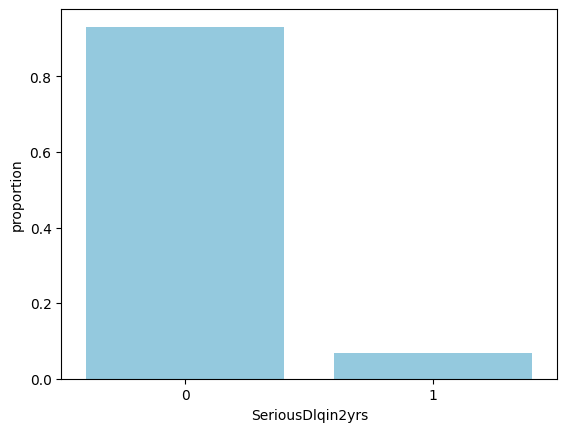

In [6]:
target = 'SeriousDlqin2yrs'
sns.countplot(df, x = target, stat = 'proportion', color = 'skyblue');
df[target].value_counts(True)

Está muy desbalanceado, el 92% no ha tenido ninguna dificultad y el 7% sí. Si no se balancea, el modelo aprenderá a predecir que nadie va a tener dificultades financieras.

### #2 Modelado

Realiza un proceso completo de modelado hasta dar con el mejor modelo de los que hayas escogido (emplea al menos 3, y uno tiene que ser KNN). Aplica las técnicas que creas necesarias para obtener el mejor resultado (suponiendo que este después de hablar con el negocio es el recall medio, para tener un compromiso entre las dos clases). Para comparar modelos emplea validación cruzada antes de optimización y luego ajusta los hiperparámetros del mejor modelo. Evalúa este y haz un pequeño análisis de errores.

Modelos a considerar:
* Regresión Logística (baseline)
* KNN
* Random Forest
* XGBoost
* LightGBM

#### Preparación variables

In [7]:
# Separación train-test antes del tratamiento de los nulos

train, test = train_test_split(df, test_size = 0.2, random_state = 42)

In [8]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10029 entries, 5441 to 7270
Data columns (total 11 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   SeriousDlqin2yrs                      10029 non-null  int64  
 1   RevolvingUtilizationOfUnsecuredLines  10029 non-null  float64
 2   age                                   10029 non-null  int64  
 3   NumberOfTime30-59DaysPastDueNotWorse  10029 non-null  int64  
 4   DebtRatio                             10029 non-null  float64
 5   MonthlyIncome                         9458 non-null   float64
 6   NumberOfOpenCreditLinesAndLoans       10029 non-null  int64  
 7   NumberOfTimes90DaysLate               10029 non-null  int64  
 8   NumberRealEstateLoansOrLines          10029 non-null  int64  
 9   NumberOfTime60-89DaysPastDueNotWorse  10029 non-null  int64  
 10  NumberOfDependents                    9889 non-null   float64
dtypes: float64(4), int

In [9]:
n_dep = 'NumberOfDependents'
m_income = 'MonthlyIncome'

# Veo con qué valor tapo los nulos

train[[n_dep, m_income]].describe()

,NumberOfDependents,MonthlyIncome
count,9889.000000,9458.000000
mean,0.819395,6899.357158
std,1.134976,12785.807976
min,0.000000,0.000000
25%,0.000000,3481.000000
50%,0.000000,5415.500000
75%,1.000000,8290.750000
max,10.000000,702500.000000


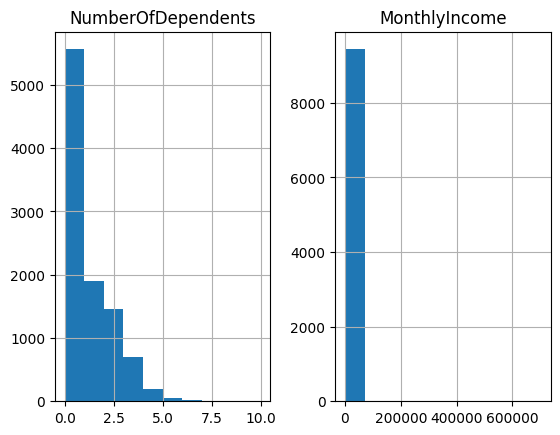

In [10]:
train[[n_dep, m_income]].hist();

In [11]:
print('m_income')
print('Moda:', train[m_income].mode()[0])
print('Mediana:', train[m_income].median())
print('Media:', train[m_income].mean())

print('\nn_dep')
print('Moda:', train[n_dep].mode()[0])
print('Mediana:', train[n_dep].median())
print('Media:', train[n_dep].mean())

m_income
Moda: 5000.0
Mediana: 5415.5
Media: 6899.357157961514

n_dep
Moda: 0.0
Mediana: 0.0
Media: 0.8193952876933968


In [12]:
# Tapo con la moda (la mediana en este caso es igual) en n_dep y con mediana en m_income

n_dep_mode = train[n_dep].mode()[0]
m_income_median = train[m_income].median()

train[n_dep] = train[n_dep].fillna(n_dep_mode)
train[m_income] = train[m_income].fillna(m_income_median)

test[n_dep] = test[n_dep].fillna(n_dep_mode)
test[m_income] = test[m_income].fillna(m_income_median)

In [13]:
tb.describe_df(train, na_count = True, sort_by = 2)

,#,Data type,Missings,% Missings,Unique values,% Cardinality
SeriousDlqin2yrs,4,int64,0,0.0,2,0.02
RevolvingUtilizationOfUnsecuredLines,5,float64,0,0.0,8616,85.91
age,10,int64,0,0.0,78,0.78
NumberOfTime30-59DaysPastDueNotWorse,6,int64,0,0.0,10,0.10
DebtRatio,3,float64,0,0.0,9278,92.51
MonthlyIncome,9,float64,0,0.0,3556,35.46
NumberOfOpenCreditLinesAndLoans,7,int64,0,0.0,41,0.41
NumberOfTimes90DaysLate,8,int64,0,0.0,13,0.13
NumberRealEstateLoansOrLines,1,int64,0,0.0,16,0.16
NumberOfTime60-89DaysPastDueNotWorse,0,int64,0,0.0,8,0.08


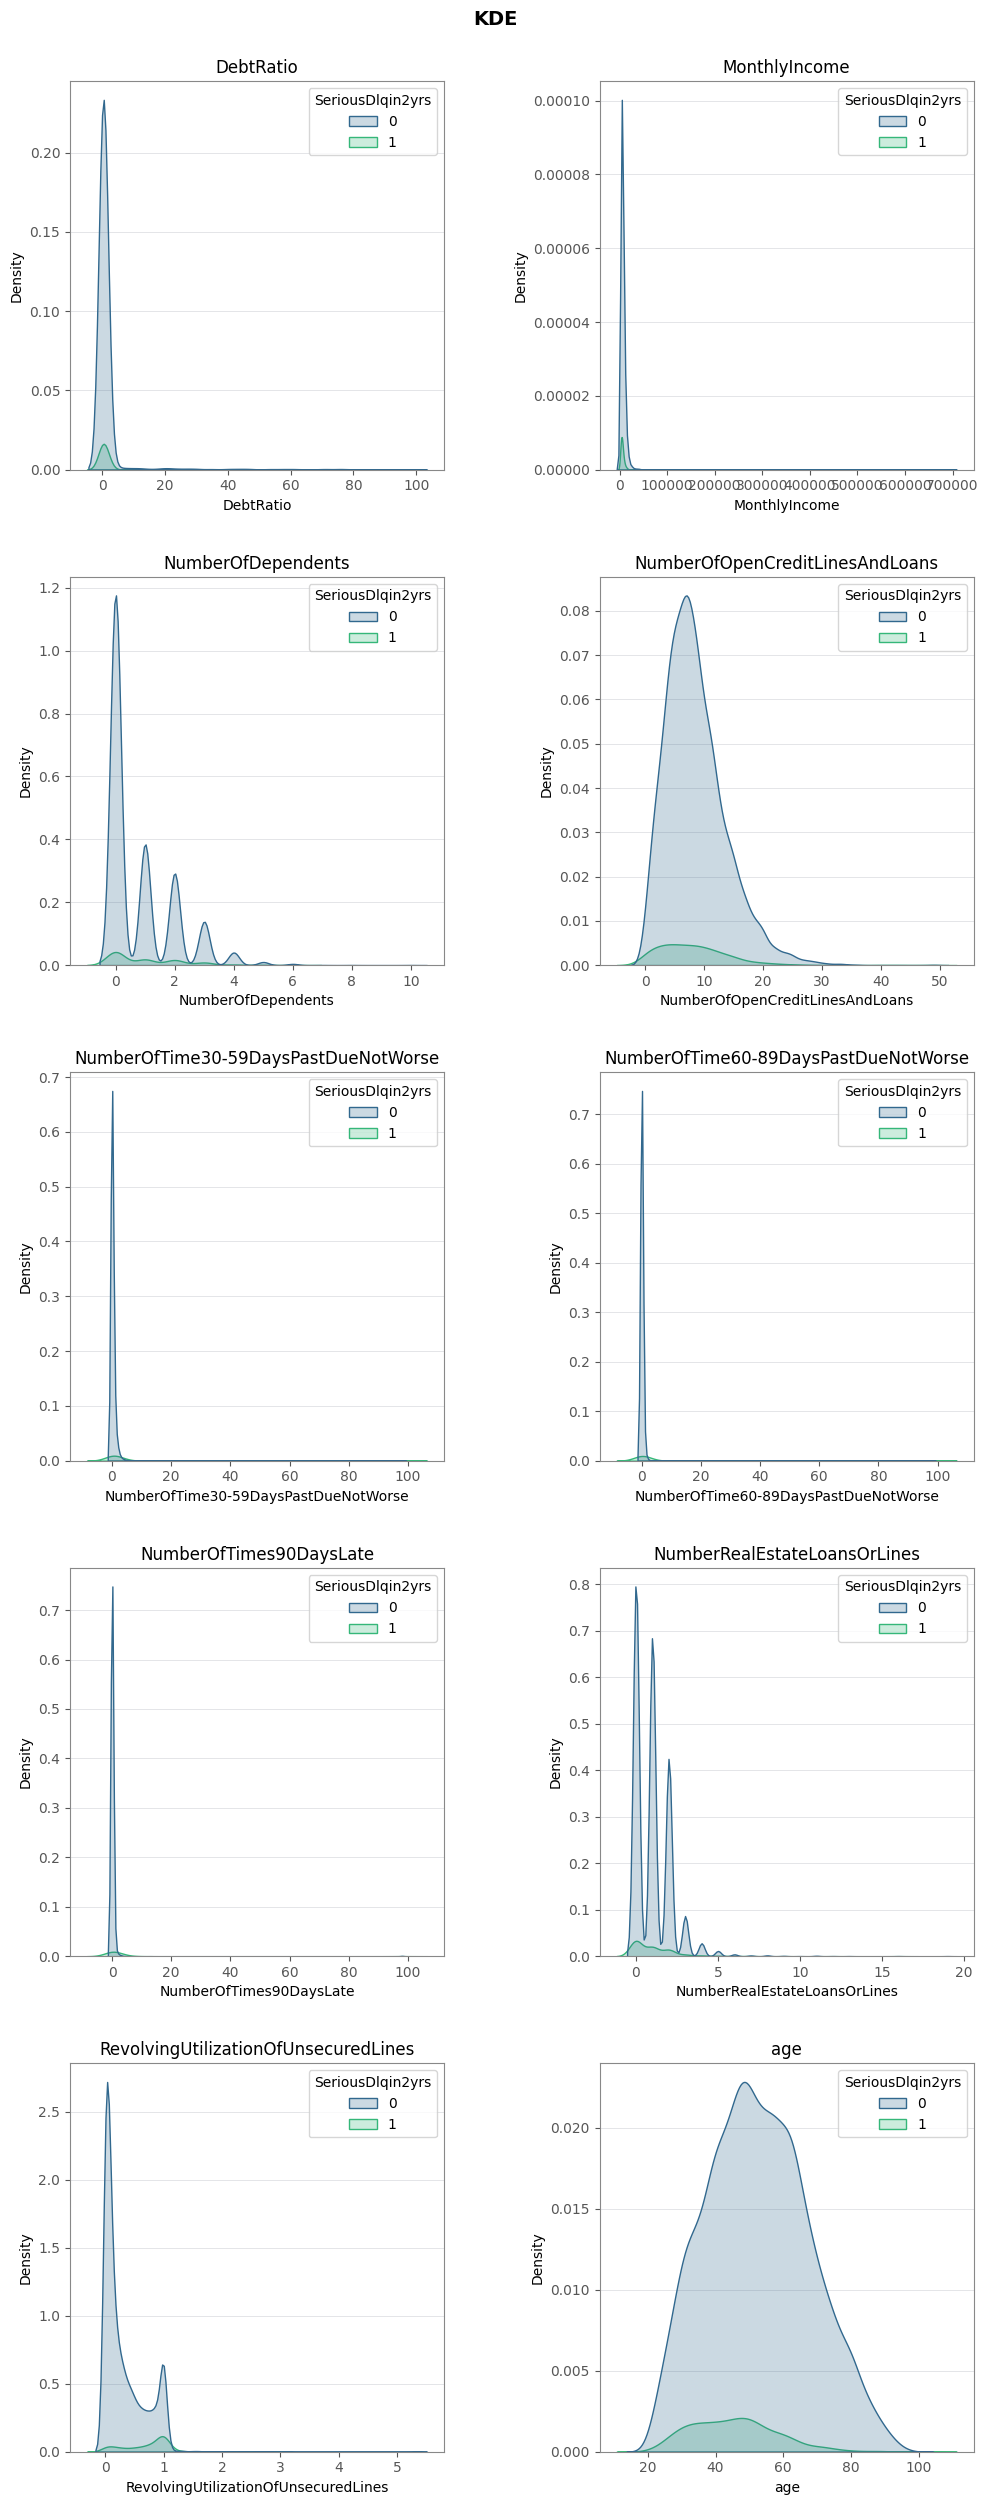

In [14]:
features = train.columns.difference([target]).tolist()
vt.plot_kde(train, target, features, n_columns = 2)

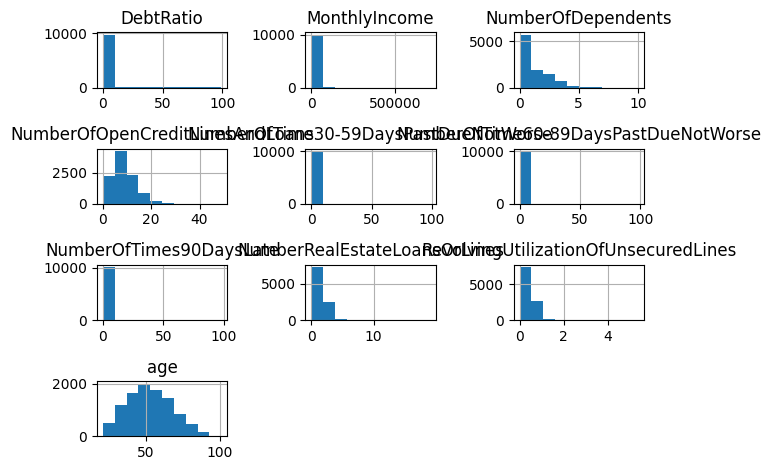

In [15]:
train[features].hist();
plt.tight_layout()

Tras observar los KDEs y los histogramas, se ve que las features no tienen una distribución normal (salvo age) y tienen rangos muy amplios.

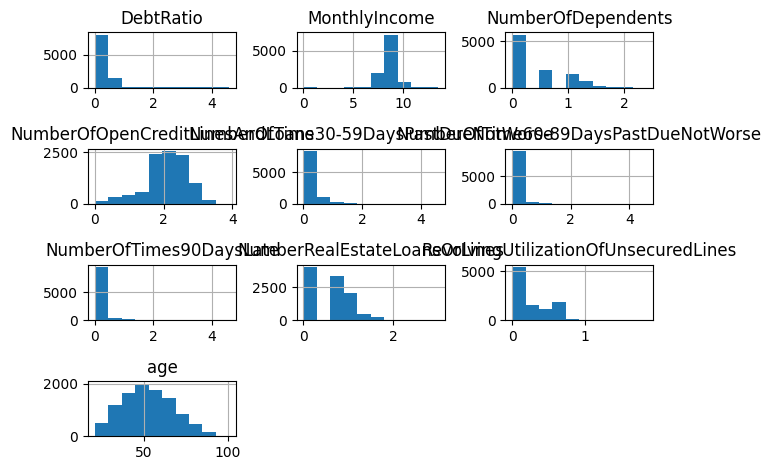

In [16]:
for col in features:
    if col != 'age':
        train[col] = np.log1p(train[col])
        test[col] = np.log1p(test[col])

train[features].hist();
plt.tight_layout()

In [17]:
scaler = StandardScaler()

train[features] = scaler.fit_transform(train[features])
test[features] = scaler.transform(test[features])

In [18]:
y_train = train[target]
X_train = train.drop(target, axis = 1)
y_test = test[target]
X_test = test.drop(target, axis = 1)

### Entrenamiento de modelos

#### Baseline models

In [19]:
import os

os.environ['OMP_NUM_THREADS'] = '1'

In [20]:
lgr_cl = LogisticRegression(max_iter = 10000, random_state = 42)
knn_cl = KNeighborsClassifier(n_neighbors = 5)
rf_cl = RandomForestClassifier(random_state = 42)
xgb_cl = XGBClassifier(max_depth = 5, verbosity = 0, random_state = 42)
lgb_cl = LGBMClassifier(max_depth = 5, verbosity = -1, random_state = 42)

names = ['Logistic Regression', 'KNN', 'Random Forest', 'XGBoost', 'LightGBM']
models = [lgr_cl, knn_cl, rf_cl, xgb_cl, lgb_cl]
metrics = []

for name, mod in zip(names, models):
    balanced_accuracy = np.mean(cross_val_score(mod, X_train, y_train, cv = 5, scoring = 'balanced_accuracy'))
    metrics.append(balanced_accuracy)
    print(f'Recall medio de {name}: {balanced_accuracy}')

Recall medio de Logistic Regression: 0.5639755637804881
Recall medio de KNN: 0.5924177907707222
Recall medio de Random Forest: 0.5795286323124735
Recall medio de XGBoost: 0.5852492267760151


/Users/maria/.pyenv/versions/3.12.4/lib/python3.12/site-packages/joblib/externals/loky/backend/context.py:136: UserWarning: Could not find the number of physical cores for the following reason:
[Errno 2] No such file or directory: 'sysctl'
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "/Users/maria/.pyenv/versions/3.12.4/lib/python3.12/site-packages/joblib/externals/loky/backend/context.py", line 270, in _count_physical_cores
    cpu_info = subprocess.run(
               ^^^^^^^^^^^^^^^
  File "/Users/maria/.pyenv/versions/3.12.4/lib/python3.12/subprocess.py", line 548, in run
    with Popen(*popenargs, **kwargs) as process:
         ^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/maria/.pyenv/versions/3.12.4/lib/python3.12/subprocess.py", line 1026, in __init__
    self._execute_child(args, executable, preexec_fn, close_fds,
  File "/Users/maria/.pyenv/versions/3.12.4

Recall medio de LightGBM: 0.5893442196988914


Los recalls son en general bastante mejorables, aunque siendo los modelos base sin el target ajustado no es algo raro.

#### Ajuste de hiperparámetros

In [21]:
lgr_cw = LogisticRegression(max_iter = 1000, class_weight = 'balanced', random_state = 42)
knn_cw = KNeighborsClassifier(weights = 'distance', n_neighbors = 5)
rf_cw = RandomForestClassifier(class_weight = 'balanced', random_state = 42)

# A typical value to consider: sum(negative instances) / sum(positive instances)
xgb_cw = XGBClassifier(max_depth = 5, verbosity = 0, scale_pos_weight = len(train.loc[train[target] == 0]) / len(train.loc[train[target] == 1]),random_state = 42)
lgb_cw = LGBMClassifier(max_depth = 5, verbosity = -1, class_weight = 'balanced', random_state = 42)

names = ['Logistic Regression', 'KNN', 'Random Forest', 'XGBoost', 'LightGBM']
models_hp = [lgr_cw, knn_cw, rf_cw, xgb_cw, lgb_cw]
metrics = []

for name, mod in zip(names, models_hp):
    balanced_accuracy = np.mean(cross_val_score(mod, X_train, y_train, cv = 5, scoring = 'balanced_accuracy'))
    metrics.append(balanced_accuracy)
    print(f'Recall medio de {name}: {balanced_accuracy}')

Recall medio de Logistic Regression: 0.7675397937381716
Recall medio de KNN: 0.5925475886226993
Recall medio de Random Forest: 0.558342465001582
Recall medio de XGBoost: 0.6769144196223623
Recall medio de LightGBM: 0.7499516620648483


Han mejorado todos, los que más la regresión logística, LightGBM y XGBoost

#### Ajuste mediante SMOTE de modelos base

In [22]:
smote = SMOTE(random_state = 42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

print(y_train.value_counts(True))
print(y_train_smote.value_counts(True))

print(X_train.shape)
print(X_train_smote.shape)

SeriousDlqin2yrs
0    0.930103
1    0.069897
Name: proportion, dtype: float64
SeriousDlqin2yrs
0    0.5
1    0.5
Name: proportion, dtype: float64
(10029, 10)
(18656, 10)


In [23]:
for name, mod in zip(names, models):
    balanced_accuracy = np.mean(cross_val_score(mod, X_train_smote, y_train_smote, cv = 5, scoring = 'balanced_accuracy'))
    metrics.append(balanced_accuracy)
    print(f'Recall medio de {name}: {balanced_accuracy}')

Recall medio de Logistic Regression: 0.7818395788614663
Recall medio de KNN: 0.9054990244505172
Recall medio de Random Forest: 0.9490252550939774
Recall medio de XGBoost: 0.9402384995790338
Recall medio de LightGBM: 0.9272113939582024


Todos tienen muchísimas mejores métricas tras aplicar SMOTE. Se seleccionan LightGBM, XGBoost y Random Forest para el ajuste de hiperparámetros

In [24]:
# LightGBM

lgb_params = {
    'n_estimators': [50, 100, 200],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.5, 1],
    'class_weight': ['balanced', None]
}

lgb_grid = GridSearchCV(lgb_cl, # el mismo que baseline
                        lgb_params, cv = 5, scoring = 'balanced_accuracy', n_jobs = -1)

lgb_grid.fit(X_train_smote, y_train_smote)

print(f'Mejores hiperparámetros para LightGBM: {lgb_grid.best_params_}')
print(f'Mejor score para XGBoost: {lgb_grid.best_score_}')

print(classification_report(y_test, lgb_grid.best_estimator_.predict(X_test)))

/Users/maria/.pyenv/versions/3.12.4/lib/python3.12/site-packages/joblib/externals/loky/backend/context.py:136: UserWarning: Could not find the number of physical cores for the following reason:
[Errno 2] No such file or directory: 'sysctl'
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "/Users/maria/.pyenv/versions/3.12.4/lib/python3.12/site-packages/joblib/externals/loky/backend/context.py", line 270, in _count_physical_cores
    cpu_info = subprocess.run(
               ^^^^^^^^^^^^^^^
  File "/Users/maria/.pyenv/versions/3.12.4/lib/python3.12/subprocess.py", line 548, in run
    with Popen(*popenargs, **kwargs) as process:
         ^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/maria/.pyenv/versions/3.12.4/lib/python3.12/subprocess.py", line 1026, in __init__
    self._execute_child(args, executable, preexec_fn, close_fds,
  File "/Users/maria/.pyenv/versions/3.12.4

### Testing

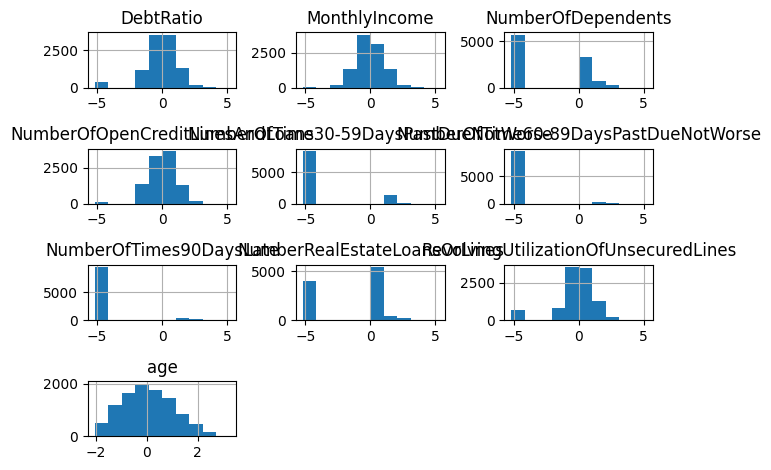

In [ ]:
# BUSCAR BIEN

from sklearn.preprocessing import quantile_transform

train_copy = train.copy()
test_copy = test.copy()

features_age = [col for col in features if col !='age']

train_copy[features_age] = quantile_transform(train_copy[features_age], output_distribution = 'normal')
test_copy[features_age] = quantile_transform(test_copy[features_age], output_distribution = 'normal')

train_copy[features].hist();
plt.tight_layout()